In [1]:
import yfinance as yf
import pandas as pd
import quantstats as qs


In [2]:
portfolio_df = pd.read_csv('/Users/jerryy/Desktop/weight01.csv')

In [3]:
risk_free_rate = 0

In [4]:
start_date = '2018-1-1'  
end_date = '2023-1-1'

In [5]:
historical_data = pd.DataFrame()
for ticker in portfolio_df['ticker']:
    stock_data = yf.download(ticker, start=start_date, end=end_date)['Adj Close']
    historical_data[ticker] = stock_data.pct_change() * portfolio_df.loc[portfolio_df['ticker'] == ticker, 'weight'].iloc[0]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [6]:
portfolio_daily_returns = historical_data.sum(axis=1)

In [7]:
portfolio_daily_returns

Date
2018-01-01    0.000000
2018-01-02    0.000103
2018-01-03    0.003151
2018-01-04   -0.002610
2018-01-05    0.005034
                ...   
2022-12-26   -0.000216
2022-12-27    0.002355
2022-12-28   -0.001475
2022-12-29    0.006278
2022-12-30   -0.006953
Length: 1233, dtype: float64

In [8]:
sharp_ratio = qs.stats.sharpe(portfolio_daily_returns, rf=risk_free_rate)
sharp_ratio

0.789807646851993

In [9]:
benchmark_data = yf.download('ESGG', start=start_date, end=end_date)['Adj Close'].pct_change()


[*********************100%%**********************]  1 of 1 completed


                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2018-01-03   2018-01-03
End Period                 2022-12-30   2022-12-30
Risk-Free Rate             0.0%         0.0%
Time in Market             94.0%        100.0%

Cumulative Return          38.9%        73.01%
CAGR﹪                     4.65%        7.88%

Sharpe                     0.44         0.79
Prob. Sharpe Ratio         82.98%       95.75%
Smart Sharpe               0.41         0.74
Sortino                    0.59         1.1
Smart Sortino              0.55         1.03
Sortino/√2                 0.42         0.78
Smart Sortino/√2           0.39         0.73
Omega                      1.16         1.16

Max Drawdown               -32.31%      -26.85%
Longest DD Days            507          311
Volatility (ann.)          20.01%       15.78%
R^2                        0.56         0.56
Information Ratio          0.02         0.02
Calmar               

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-01-20,2020-03-23,2020-09-14,239,-26.847554,-24.057125
2,2022-01-05,2022-03-08,2022-11-11,311,-11.981562,-10.917735
3,2018-08-30,2018-12-25,2019-02-04,159,-11.640123,-10.708130
4,2018-01-24,2018-02-09,2018-04-26,93,-6.996344,-6.453611
5,2020-10-13,2020-10-30,2020-11-09,28,-6.831816,-6.715829


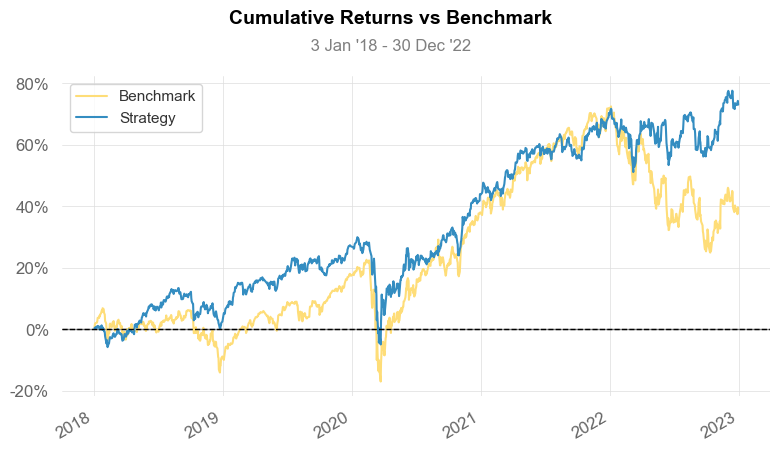

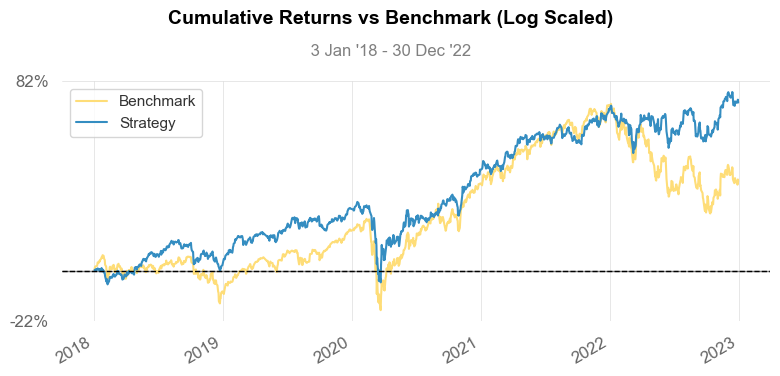

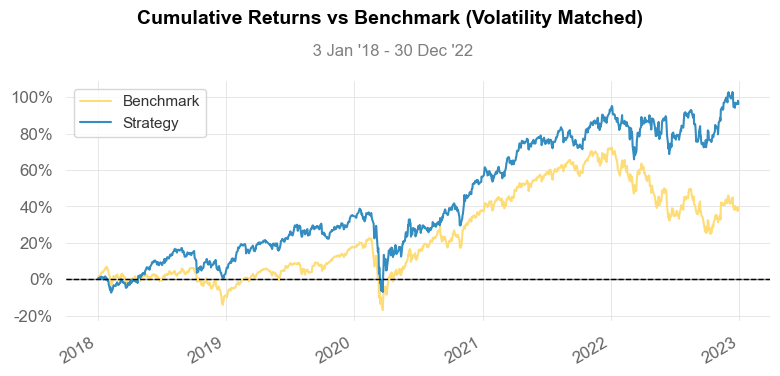

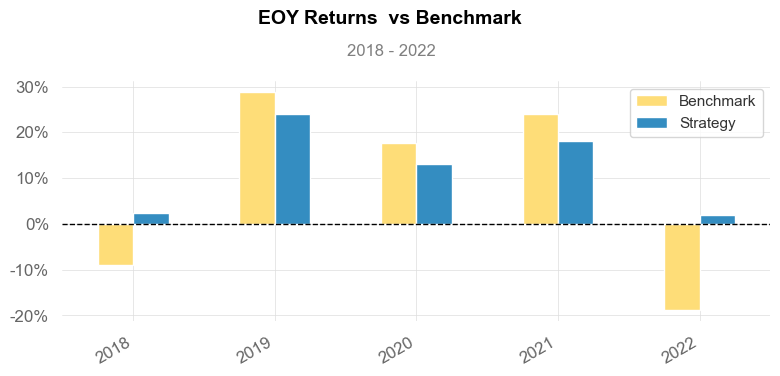

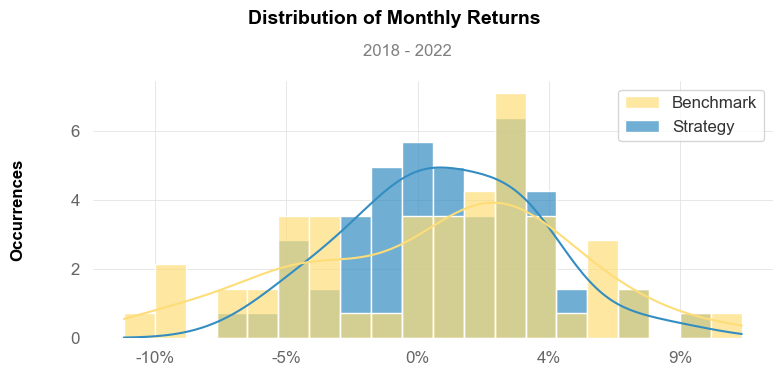

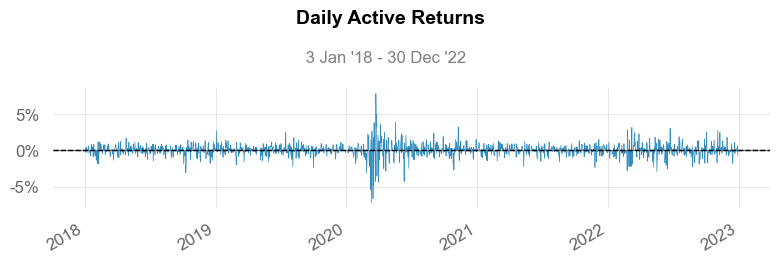

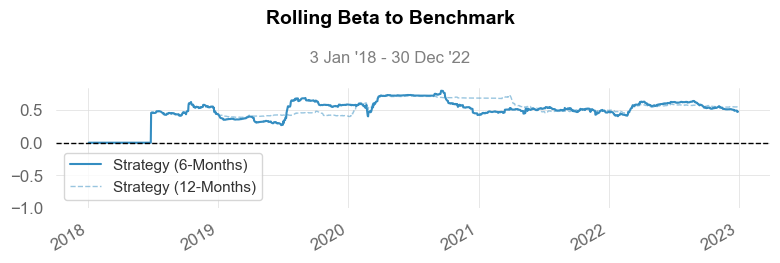

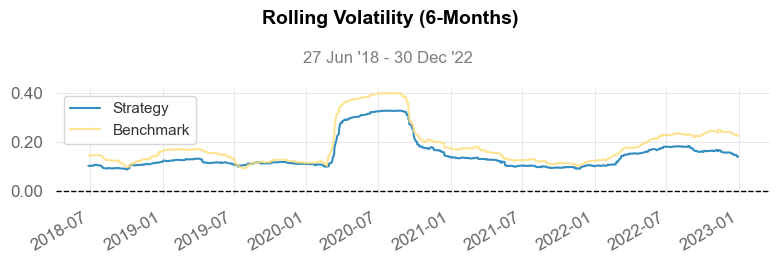

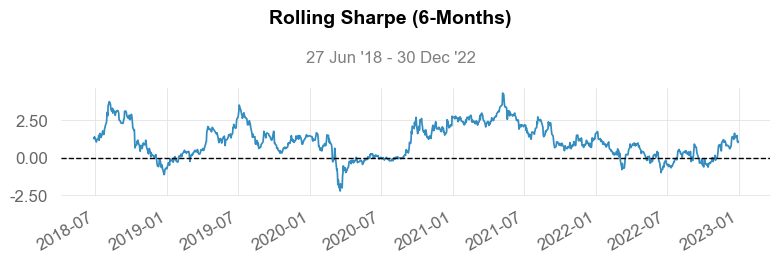

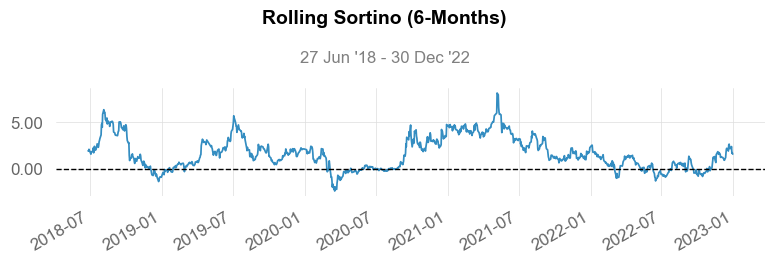

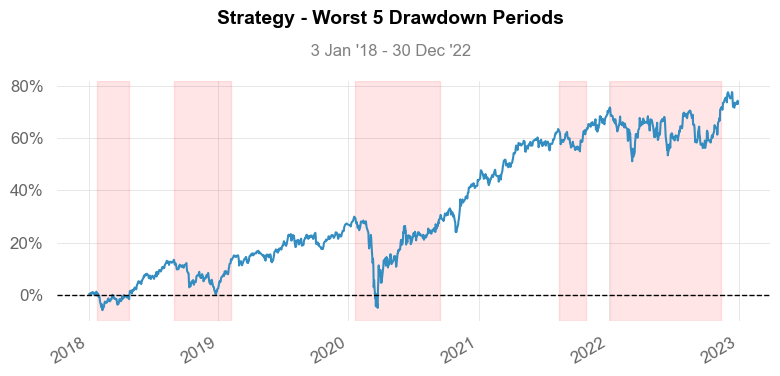

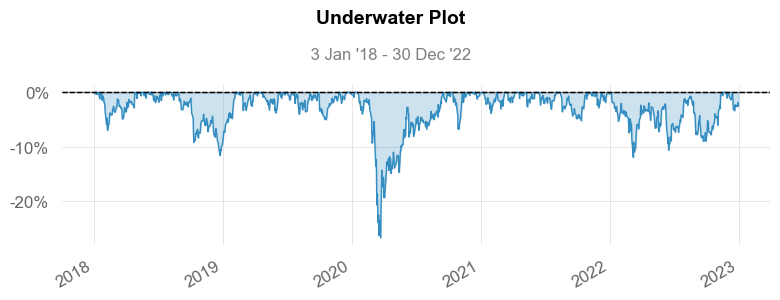

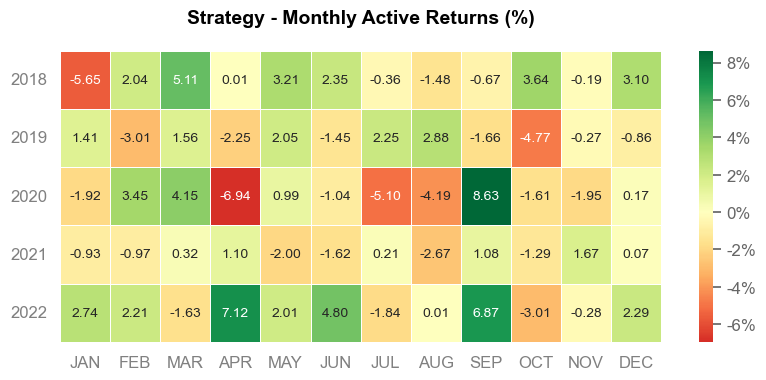

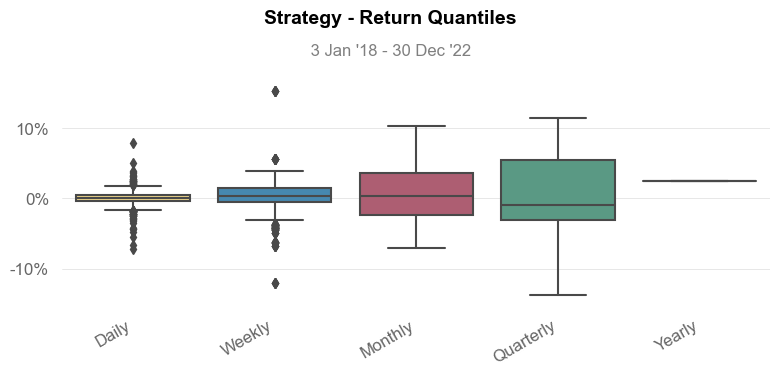

In [10]:
qs.reports.full(portfolio_daily_returns, benchmark_data)